# 1.3.1 NumPy Array Object

本节内容
- Numpy 和 Numpy array 是什么
- 创建数组
- 基本数据类型
- 基本可视呈现
- 索引和切片
- 复制和视图
- 花式索引

## 1.3.1.1 Numpy和Numpy array是什么

### Numpy Array


In [8]:
import numpy as np

a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

举例来说，一个数组包含了：
- 离散时间步的试验/模拟值
- 由测量装置记录的信号，例如声波
- 图像像素，灰度或者颜色
- 在不同的XYZ位置测量的3-D数据，例如*MRI*扫描
- ……

In [5]:
L = range(1000)
%timeit [i**2 for i in L]

385 µs ± 9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
a = np.arange(1000)
%timeit a**2

1.58 µs ± 53.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.61 µs ± 52.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Numpy引用文档
http://docs.scipy.org/

In [8]:
np.array?


In [13]:
np.lookfor('create array')

In [10]:
np.con*?

np.concatenate
np.conj
np.conjugate
np.convolve


### Import约定

推荐约定到导入方式：

```python
import numpy as np
```

## 1.3.1.2 创建数组

### 手动构件数组


- 1-D（一维数组）

In [14]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [16]:
a.ndim    # 查看维数

1

In [17]:
a.shape

(4,)

In [18]:
len(a)

4

- 2-D, 3-D ...

In [20]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 * 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [23]:
b.ndim    # 2
b.shape   # (2, 3)
len(b)    # 2

2

In [25]:
c = np.array([[[0], [1], [2]],[[3], [4], [5]]])
c

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

In [30]:
c.ndim    # 3
c.shape   # (2, 3, 1)
len(c)    # 2

2

### 利用函数创建数组

- 均等数组

In [31]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
b = np.arange(1, 9, 2)  # start, end (exclusive), step
b

array([1, 3, 5, 7])

- 或者是通过点的数量

In [34]:
c = np.linspace(0, 1, 6)    # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [36]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- 普通数组

In [38]:
a = np.ones((3,3))
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [41]:
b = np.zeros((2,2))
b

array([[0., 0.],
       [0., 0.]])

In [42]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [43]:
d = np.diag(np.array([1,2,3,4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

- 随机数组

In [44]:
a = np.random.rand(4)    # uniform in [0, 1]
a

array([0.50755507, 0.0211933 , 0.43352176, 0.44631306])

In [45]:
b = np.random.randn(4)    # Gaussian
b

array([ 0.65034618, -0.51433646,  0.53942869,  1.52676162])

In [ ]:
np.random.seed(1234)    # Setting the random seed

## 1.3.1.3 基本数据类型

我们已经注意到，一些实例、数组元素尾部带着小数点`.`（例如`2.` vs `2`），原因在于它们是不同的数据类型：

In [46]:
a = np.array([1, 2, 3])
a.dtype

dtype('int64')

In [48]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

不同的数据类型允许我们在内存中存储数据更加细致，但是大多数时候我们使用浮点数工作。注意，上面的例子，NumPy从输入就自动探测数据类型。

我们可以明确特定的数据类型：

In [50]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

**默认**数据类型为浮点数的情况：

In [51]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

还有其他的数据类型：

In [62]:
# 复数
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype    # dtype('complex128')

# 布尔
e = np.array([True, False, False, True])
e.dtype    # dtype('bool')

# 字符串
f = np.array(['Bonjour', 'Hello', 'Hallo'])
f.dtype    # dtype('<U7')    （字符串最多的一个为7个字符）

# int32
# int64
# uint32
# uint64

## 1.3.1.4 可视化呈现

- 在*ipython*中使用`%matplotlib`交互
- 在*jupyter notebook*中使用`%matplotlib inline`交互

```
pip install matplotlib
```

*Matplotlib*是一个2-D包。

In [6]:
import matplotlib.pyplot as plt

- 1-D plotting

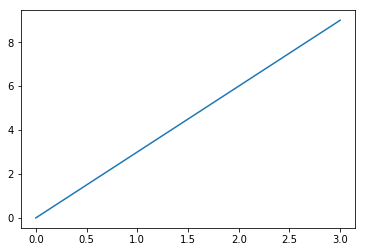

In [18]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)

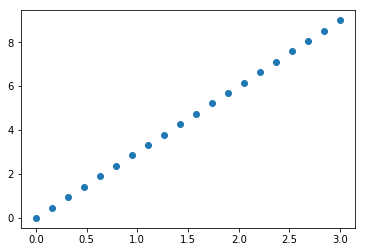

In [17]:
plt.plot(x, y, 'o')

- 2-D arrays

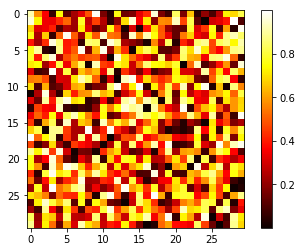

In [23]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()

## 1.3.1.5 索引和切片

In [24]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
a[0], a[2], a[-1]

(0, 2, 9)

In [26]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [28]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [31]:
a[1]       # array([0, 1, 0])
a[1, 1]    # 1
a[2, 1] = 10
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [45]:
a = np.arange(10)
a[2:9:3]    # array([2, 5, 8])
a[:4]       # array([0, 1, 2, 3])
a[1:3]      # array([1,2])
a[::2]      # array([0, 2, 4, 6, 8])
a[3:]       # array([3, 4, 5, 6, 7, 8, 9])

我们可以结合赋值和切片

In [47]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [53]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

In [ ]:
## 1.3.1.6 复制和视图

切片操作在原始数组上创建了视图（*view*），仅仅是访问数组的方式。因此原始数组不会复制到内存中，我们可以使用`np.may_share_memory()`来校验两个数组是否共享相同的内存块。但是请注意，这种启发式的方法可能会误报。

**当修改了视图，原始数组也会被修改**

In [59]:
a = np.arange(10)
b = a[::2]
np.may_share_memory(a, b)   # True
b[0] = 12
b

array([12,  2,  4,  6,  8])

In [60]:
a

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [68]:
a = np.arange(10)
c = a[::2].copy()
np.may_share_memory(a, c)    # False
c[0] = 12
a


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 1.3.1.7 花式索引(Fancy indexing)

Numpy数组可以使用切片索引，但是也可以使用布尔或整数数组（**掩码masks**）索引。这种方式成为花式索引（Fancy indexing），它创建副本，而不是视图。

### 使用布尔掩码

In [76]:
np.random.seed(3)
a = np.random.randint(0,21,15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [77]:
(a % 3 ==0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [81]:
mask = (a % 3 ==0 )
extract_from_a = a[mask]
extract_from_a

array([ 3,  0,  9,  6,  0, 12])

In [83]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### 用整数数组索引

In [84]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

索引可以用一个整数数组完成，其中相同的索引重复几次：

In [85]:
a[[2,3,2,4,2]]

array([20, 30, 20, 40, 20])

In [88]:
a[[9,7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

通过整数所以创建的数组，新数组与整数数组具有相同的切片：

In [91]:
a = np.arange(10)
idx = np.array([[3,4],[9,7]])
idx.shape

(2, 2)

In [96]:
a[idx]

array([[3, 4],
       [9, 7]])